In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import AcFCM

In [11]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

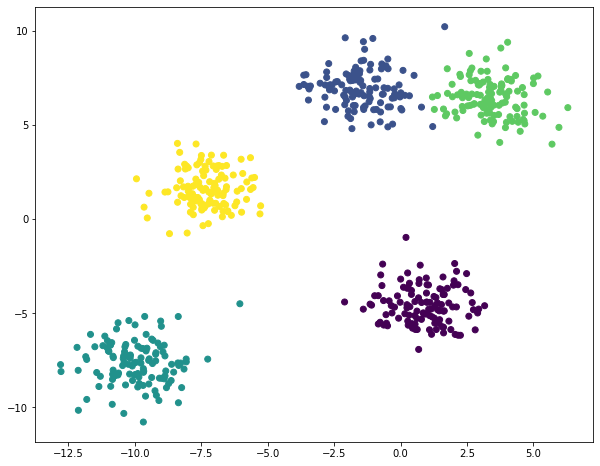

In [12]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=1, random_state=100)
plot_datapoints(X, y)

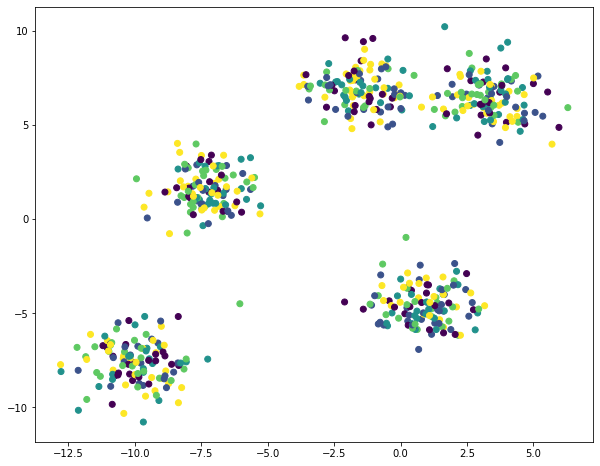

0) J_fcm: 11367.305196773948, V_XB: 325.7822277513659
1) J_fcm: 7325.198141376588, V_XB: 928.6083792034933
2) J_fcm: 7287.846107626444, V_XB: 328.94089458575587
3) J_fcm: 7106.330641732532, V_XB: 100.30113594459078
4) J_fcm: 6380.380023359468, V_XB: 24.262972636404474
5) J_fcm: 4629.105627778354, V_XB: 4.636577002140033
6) J_fcm: 2923.0137642888353, V_XB: 0.9588319082152179
7) J_fcm: 1276.8384028445948, V_XB: 0.13211540933824645
8) J_fcm: 1065.8343509831761, V_XB: 0.07810173150870903
9) J_fcm: 1060.9575894315653, V_XB: 0.07312448887303238
10) J_fcm: 1060.8376058040983, V_XB: 0.07241969070683066
11) J_fcm: 1060.8331927809425, V_XB: 0.07231750961369775
12) J_fcm: 1060.8329512541197, V_XB: 0.07230401336943407
13) J_fcm: 1060.8329342757595, V_XB: 0.07230274286241785
14) J_fcm: 1060.8329329213946, V_XB: 0.07230282096453147


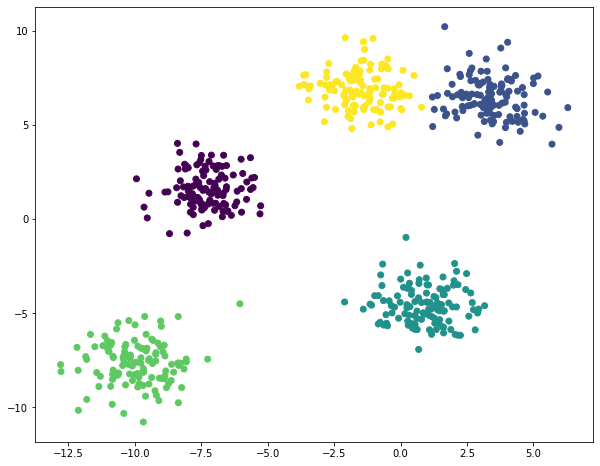

In [25]:
ac_fcm = AcFCM(X, 5)
plot_datapoints(X, np.argmax(ac_fcm.run(0)[0], axis=1))
plot_datapoints(X, np.argmax(ac_fcm.run()[0], axis=1))